<a href="https://colab.research.google.com/github/170294r/Pump-it-Up-Data-Mining-the-Water-Table-/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [ ]:
pd.options.display.max_columns=100

In [ ]:
import io
features = pd.read_csv(io.BytesIO(uploaded['Training set values.csv']))
targets = pd.read_csv( io.BytesIO(uploaded['Training set labels.csv']))
df = features.join(targets, how='left')
df_train_set = df.drop('status_group', axis=1)
df_train_labels = targets

KeyError: ignored

In [ ]:
!pip install category_encoders

In [ ]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

get the CSV files 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['clean_data.csv']))

In [ ]:
pd.options.display.max_columns=100 # to see all columns

In [ ]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [ ]:
df1= df.copy()

In [ ]:
df1.drop(columns=['lga','ward'],inplace=True )

In [ ]:
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [ ]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [ ]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [ ]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [ ]:
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [ ]:
# assign target
target='status_group'

In [ ]:
# seperate columns to X,y 
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [ ]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info']) # to see all results

In [ ]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9201599326599327
TEST: 0.7961279461279461

Balanced Accuracy:
TRAIN: 0.932632310756815
TEST: 0.7123422369073463


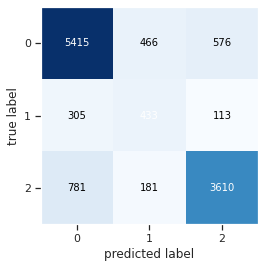

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.712 , 
       'train_balanced_acc' : 0.933,
               'info' : 'gridsearch best param'}, ignore_index=True)

Accuracy:
TRAIN: 0.7888888888888889
TEST: 0.7801346801346801

Balanced Accuracy:
TRAIN: 0.614396263296231
TEST: 0.6046213114508435


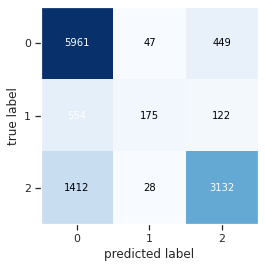

In [ ]:
#seting model
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 10, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'LGBM' ,
      "test_balanced_acc": 0.602 , 
       'train_balanced_acc' : 0.617,
               'info' : ''}, ignore_index=True)

Accuracy:
TRAIN: 0.8434974747474747
TEST: 0.8018518518518518

Balanced Accuracy:
TRAIN: 0.6840797548690926
TEST: 0.6314626674611675


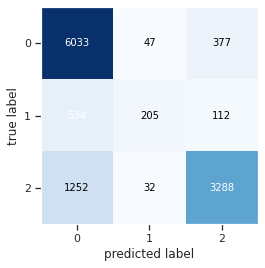

In [ ]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.629 , 
       'train_balanced_acc' : 0.682,
               'info' : ''}, ignore_index=True)

In [ ]:
df4=df1.copy()

In [ ]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    df4[str(c) + '_encoded'] = encoder.fit_transform(df4[c].values, df4[target])
    df4.drop(columns=c, inplace=True)

In [ ]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df4[col])),columns=[col])
    return df

scaled_df = scaleColumns(df4,[num_col])

In [ ]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [ ]:
# making over-sampling 

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_sample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64
2    32259
1    32259
0    32259
dtype: int64


In [ ]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [ ]:
# setting classifier
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9699693881505018
TEST: 0.8644864641454846

Balanced Accuracy:
TRAIN: 0.9699750679074436
TEST: 0.8644598610908146


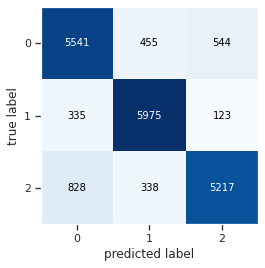

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.860 , 
       'train_balanced_acc' : 0.952,
               'info' : 'with SMOTE'}, ignore_index=True)

In [ ]:
df_results

,Model,test_balanced_acc,train_balanced_acc,info
0,RandomForest,0.712,0.933,gridsearch best param
1,LGBM,0.602,0.617,
2,XGBoost,0.629,0.682,
3,XGBoost,0.860,0.952,with SMOTE


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test set values.csv to Test set values (3).csv


In [ ]:
test = pd.read_csv( io.BytesIO(uploaded['Test set values.csv']))

In [ ]:
pd.options.display.max_columns=100 # to see all columns
test.drop(columns=['funder','installer','construction_year'],inplace=True )
test1= test.copy()
test1.drop(columns=['lga','ward'],inplace=True )
test1['permit'] = test1['permit'].astype(bool).astype(int)
test1['public_meeting'] = test1['public_meeting'].astype(bool).astype(int)
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type','decade','installer_cat','funder_cat']
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [ ]:
test1

In [ ]:
df

In [ ]:
df

In [ ]:
df1

In [ ]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


In [ ]:
# predictions on test set
y_pred_test1 = pipe.predict(test1)


NotFittedError: ignored

In [ ]:
df1['status_group'].value_counts()

In [ ]:
len(y_pred_test)

19356

In [ ]:
len(test)

14850

In [ ]:
yvalu = pd.DataFrame(myarray)
df.to_csv('myfile.csv')

In [ ]:
print(y_pred_test.value_counts())

AttributeError: ignored